In [30]:
import cv2
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Directory paths
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

# Prepare dataframes for training and testing data
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, target_size=(96, 96))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 96, 96, 3)
    return features

# Extract features
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

# Normalize pixel values
x_train = train_features / 255.0
x_test = test_features / 255.0

# Encoding labels
le = LabelEncoder()
le.fit(train['label'])

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build the model
model = Sequential()
# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# Output layer: Binary classification
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x=x_train, y=y_train, batch_size=128, epochs=2, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

# Save the model
model_json = model.to_json()
with open("facedetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("facedetector.h5")

# Load the model
from keras.models import model_from_json

json_file = open("facedetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facedetector.h5")

# Define labels
label = ['Human', 'non_Human']

def ef(image):
    img = load_img(image, target_size=(96, 96))
    feature = np.array(img)
    feature = feature.reshape(1, 96, 96, 3)
    return feature / 255.0




angry completed
angry completed


  0%|          | 0/1433 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

c:\ProgramData\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 679s 55s/step - accuracy: 0.8328 - loss: 0.2039 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 674s 56s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00


Test accuracy: 1.00


Testing image
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
Model prediction is non-face


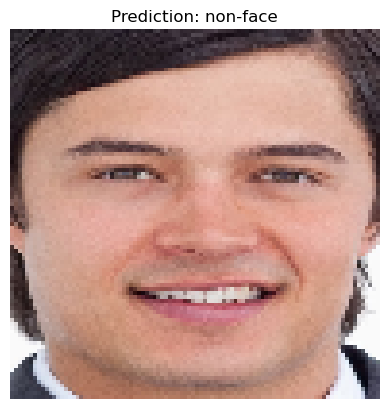

In [33]:
# Test the model with an example image
image = 'images/test/human/face_55.jpg' # Replace with the path to your test image
print("Testing image")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)

# Display the image
plt.imshow(img.reshape(96, 96, 3))
plt.title(f"Prediction: {pred_label}")
plt.axis('off')
plt.show()

In [2]:
import os

def count_images_in_folder(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    files = os.listdir(folder_path)
    image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
    
    return image_count

folder_path = r'C:\Users\MAHMUDUL HASAN\Desktop\Human_Detection\images\train\human'

num_images = count_images_in_folder(folder_path)

print(f'Number of images in the folder: {num_images}')

Number of images in the folder: 1433
